In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']

wisdm=pd.read_csv("WISDM.txt",header=None,names=columns)

In [3]:
wisdm.count()

user         1098204
activity     1098204
timestamp    1098204
x-axis       1098204
y-axis       1098204
z-axis       1098203
dtype: int64

In [4]:
wisdm=wisdm.dropna()

In [5]:
wisdm.dtypes

user           int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis        object
dtype: object

In [6]:
wisdm.user=wisdm.user.astype(int)

In [7]:
wisdm.activity=wisdm.activity.astype(str)

In [8]:
wisdm["z-axis"]=wisdm["z-axis"].astype(str)

In [9]:
wisdm["z-axis"]=wisdm["z-axis"].str.replace(";",'')

In [10]:
wisdm["z-axis"]=wisdm["z-axis"].astype(float)

In [11]:
wisdm.dtypes

user           int32
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [12]:
wisdm.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [13]:
wisdm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
user         1098203 non-null int32
activity     1098203 non-null object
timestamp    1098203 non-null int64
x-axis       1098203 non-null float64
y-axis       1098203 non-null float64
z-axis       1098203 non-null float64
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 54.5+ MB


In [14]:
wisdm.describe()

,user,timestamp,x-axis,y-axis,z-axis
count,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06
mean,1.886067e+01,3.340910e+13,6.628645e-01,7.255642e+00,4.110616e-01
std,1.021423e+01,4.944968e+13,6.849060e+00,6.746207e+00,4.754109e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019128e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722802e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996572e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [15]:
wisdm.activity.unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [16]:
wisdm.activity.value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [17]:
(wisdm.user.unique())

array([33, 17, 20, 29, 13, 15,  6, 27, 36, 18, 32, 35, 11, 16,  5, 10, 28,
       26, 14, 24, 12, 23,  4, 30, 34,  8, 31, 21,  3, 22,  1,  9, 25,  2,
        7, 19], dtype=int64)

In [18]:
wisdm.user.value_counts()

20    56632
19    45383
31    44282
8     41188
29    38245
14    38192
13    37093
34    35947
32    35506
21    35436
3     35161
27    34958
10    34883
18    32811
12    32641
26    32578
36    32261
11    31658
7     30967
1     29978
6     29704
33    29453
5     28509
15    28154
24    25736
23    25673
30    25335
2     23525
35    22394
22    22310
17    22020
28    21358
16    20470
25    13468
9     12923
4     11371
Name: user, dtype: int64

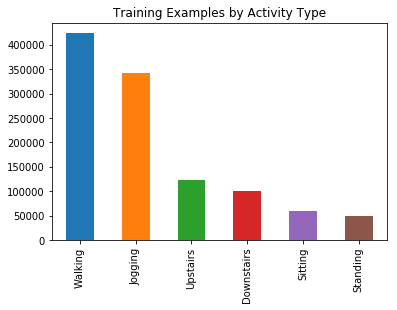

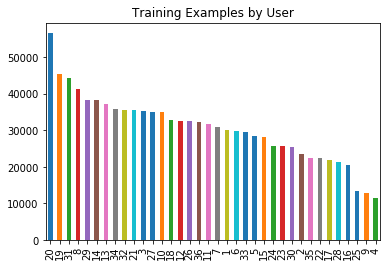

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline


wisdm.activity.value_counts().plot(kind='bar',title='Training Examples by Activity Type')
plt.show()
wisdm.user.value_counts().plot(kind='bar',title='Training Examples by User')
plt.show()


In [20]:
from statistics import mode

In [25]:
N_TIME_STEPS = 199
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(wisdm) - N_TIME_STEPS, step):
    xs = wisdm['x-axis'].values[i: i + N_TIME_STEPS]
    ys = wisdm['y-axis'].values[i: i + N_TIME_STEPS]
    zs = wisdm['z-axis'].values[i: i + N_TIME_STEPS]
    label = mode(wisdm['activity'][i: i + N_TIME_STEPS])
    segments.append([xs, ys, zs])
    labels.append(label)


In [26]:
np.unique(np.array(labels))

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype='<U10')

In [27]:
np.array(segments).shape


(54901, 3, 199)

In [29]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)


In [30]:
reshaped_segments.shape


(54901, 199, 3)

In [31]:
labels[0]


array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
from sklearn.model_selection import train_test_split

RANDOM_SEED=42

X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)


In [33]:
len(X_train)


43920

In [34]:
X_train.shape

(43920, 199, 3)

In [35]:
len(X_test)


10981

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D,LSTM
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2


C:\Users\babi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
n_timesteps,n_features=199,3
epochs,batch_size=10,64
n_outputs=6

model = Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(n_timesteps,n_features)))
model.add(LSTM(100))
#model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size ,validation_split=0.2)
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)


Train on 35136 samples, validate on 8784 samples
Epoch 1/10
35136/35136 [==============================] - 481s 14ms/step - loss: 0.6777 - acc: 0.7539 - val_loss: 0.5332 - val_acc: 0.8095
Epoch 2/10
35136/35136 [==============================] - 476s 14ms/step - loss: 0.4630 - acc: 0.8326 - val_loss: 0.4514 - val_acc: 0.8328
Epoch 3/10
35136/35136 [==============================] - 473s 13ms/step - loss: 0.3328 - acc: 0.8731 - val_loss: 0.2896 - val_acc: 0.8806
Epoch 4/10
35136/35136 [==============================] - 471s 13ms/step - loss: 0.2748 - acc: 0.8991 - val_loss: 0.2744 - val_acc: 0.9015
Epoch 5/10
35136/35136 [==============================] - 472s 13ms/step - loss: 0.2464 - acc: 0.9093 - val_loss: 0.2419 - val_acc: 0.9142
Epoch 6/10
35136/35136 [==============================] - 474s 13ms/step - loss: 0.2114 - acc: 0.9234 - val_loss: 0.2038 - val_acc: 0.9236
Epoch 7/10
35136/35136 [==============================] - 489s 14ms/step - loss: 0.1742 - acc: 0.9376 - val_loss: 0.1

In [38]:
accuracy

0.9542846734890054